# 🧊 Ice Games - Análisis de Ventas de Videojuegos

## 1. Introducción

Trabajamos para **Ice**, una tienda online especializada en videojuegos a nivel mundial. Contamos con un conjunto de datos históricos que incluye información sobre:

- Juegos lanzados desde los años 80 hasta 2016.
- Ventas por región (Norteamérica, Europa, Japón y otras).
- Géneros y plataformas.
- Reseñas de usuarios y críticos.
- Clasificación ESRB.

El objetivo principal de este proyecto es **identificar patrones que indiquen si un juego tendrá éxito o no**, con el fin de:

- Detectar proyectos prometedores.
- Planificar campañas publicitarias efectivas para el año 2017.

Nos enfocaremos especialmente en los datos más recientes y relevantes para construir un modelo sólido que respalde las decisiones estratégicas de la empresa.

---


In [1]:
import sys, pandas as pd
print(sys.executable)      # debe apuntar a ...\anaconda3\envs\portafolio\python.exe
print("pandas:", pd.__version__)


C:\Users\David Duran\anaconda3\envs\portafolio\python.exe
pandas: 2.3.1


## Paso 1. Abre el archivo de datos y estudia la información general 

In [2]:
# Carga de librerías necesarias para todo el proyecto

import pandas as pd              # Para manipulación de datos
import numpy as np               # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización básica
import seaborn as sns            # Para visualizaciones más avanzadas y estéticas
import warnings                  # Para controlar los warnings
from scipy import stats          # Para pruebas estadísticas (paso 5)
# Cargamos el dataset
df = pd.read_csv('../data/games.csv') # Cambia la ruta si trabajas desde tu PC

# Mostramos las primeras filas del DataFrame
print("🔍 Primeras filas del dataset:")
display(df.head())

# Información general del DataFrame (nombres de columnas, tipos de datos, nulos, etc.)
print("\n📋 Información general:")
df.info()

# Forma del DataFrame (filas y columnas)
print("\n📐 Forma del dataset (filas, columnas):")
print(df.shape)

# Nombres exactos de las columnas
print("\n🏷️ Nombres de las columnas:")
print(df.columns)

# Estadísticas descriptivas para columnas numéricas
print("\n📊 Estadísticas generales (numéricas):")
display(df.describe())

# Estadísticas también para columnas de texto (por ejemplo: valores únicos)
print("\n🧩 Conteo de valores únicos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

🔍 Primeras filas del dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



📋 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

📐 Forma del dataset (filas, columnas):
(16715, 11)

🏷️ Nombres de las columnas:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_S

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



🧩 Conteo de valores únicos por columna:
Name: 11559 valores únicos
Platform: 31 valores únicos
Year_of_Release: 37 valores únicos
Genre: 12 valores únicos
NA_sales: 402 valores únicos
EU_sales: 307 valores únicos
JP_sales: 244 valores únicos
Other_sales: 155 valores únicos
Critic_Score: 82 valores únicos
User_Score: 96 valores únicos
Rating: 8 valores únicos


Al observar las primeras filas y la información general del dataset, notamos que contamos con más de 16.000 registros relacionados con videojuegos lanzados en distintas plataformas y regiones del mundo.

Vemos columnas como el nombre del juego, la plataforma, el año de lanzamiento, el género, las ventas por región (NA, EU, JP, otras), además de las puntuaciones de usuarios y críticos, y la clasificación ESRB.

Sin embargo, ya desde el principio detectamos que **algunas columnas importantes tienen datos faltantes**. Por ejemplo:

- `Year_of_Release` tiene varios valores nulos.
- `Critic_Score` y `User_Score` también tienen muchísimos valores ausentes o no válidos como `'TBD'`.
- `Rating` (la clasificación de edad) no está presente en muchos casos.
- **iremos trabajando paso a paso** para limpiar estos datos, analizar lo que sí está disponible y tomar decisiones informadas sin distorsionar los resultados.

Por ahora, es solo una primera mirada general al contenido, pero nos da una buena idea del potencial y los desafíos del proyecto.

## Paso 2. Prepara los datos

In [3]:
# Convertimos los nombres de las columnas a minúsculas
df.columns = df.columns.str.lower()

# Convertimos year_of_release a tipo entero que permite nulos
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Reemplazamos 'tbd' en user_score por NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Convertimos user_score a tipo float
df['user_score'] = pd.to_numeric(df['user_score'])

# critic_score ya es float, no requiere conversión

# No modificamos rating ni rellenamos valores por ahora


Se realizaron los siguientes cambios en el dataset:

- Los nombres de las columnas se pasaron a minúsculas para facilitar su uso.
- `year_of_release` se convirtió a tipo `Int64`, ya que representa años y contiene pocos valores nulos que no se podrian rellenar por que entorpeceria el analisis. 
- En `user_score`, se reemplazaron los valores 'tbd' por `NaN` porque representan puntuaciones aún no definidas. Luego se convirtió la columna a tipo `float` para permitir análisis numéricos.
- `critic_score` ya estaba en formato `float64`, por lo que no fue necesario modificarla.

Los valores ausentes no se rellenaron. Esto se debe a que:
- En columnas como `user_score` y `critic_score`, los datos faltantes indican que el juego probablemente no fue evaluado ya bien sea por que pueden ser juegos muy desconocidos o alternativos. Agregar valores artificiales como la media o mediana distorsionaría los análisis ya que si son varios valores, se podria considerar llenar esos valores con la media pero el analisis cambiaria mucho y no diria nada "real".
- rating (~40% nulo)
En principio, no rellenaremos, pero más adelante podríamos considerar poner "Unrated" o "Unknown" si el análisis lo requiere.

Posible causa de valores nulos: juegos indie, juegos sin versión americana (donde se usa ESRB), o datos faltantes.

Se asume que los datos están ausentes por falta de evaluación, lanzamientos recientes o registros incompletos en las fuentes originales.

In [4]:
# Primeras filas para revisar cambios visuales
display(df.head())

# Verificamos los tipos de datos actualizados
print("\nTipos de datos actualizados:")
print(df.dtypes)

# Confirmamos que 'tbd' ya no está en user_score
print("\nValores únicos en 'user_score' (verificar que 'tbd' fue eliminado):")
print(df['user_score'].unique())

# Recuento de valores nulos en columnas clave
print("\nValores nulos en columnas importantes:")
print(df[['year_of_release', 'user_score', 'critic_score', 'rating']].isna().sum())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Tipos de datos actualizados:
name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Valores únicos en 'user_score' (verificar que 'tbd' fue eliminado):
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]

Valores nulos en columnas importantes:
year_of_release     269
user_score         9125
critic_score       8578
rating             6766
dtype: int64


Calcular la columna de ventas globales

In [5]:
# Creamos la columna de ventas globales sumando las ventas por región
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [6]:
print(df.head(10))

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77 

## Paso 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

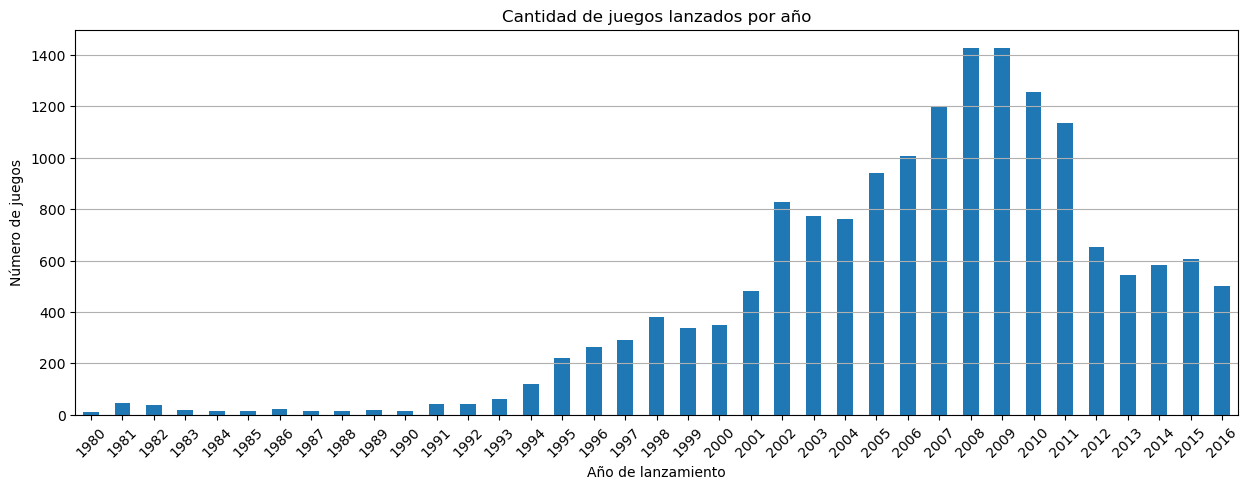

In [7]:
# Contamos juegos por año y los ordenamos cronológicamente
games_per_year = df['year_of_release'].value_counts().sort_index()

# Graficamos
games_per_year.plot(kind='bar', figsize=(15, 5))
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Los datos parecen ser significativos, ya que podemos observar que el auge de los videojuegos en los años observados fue de 2007 a 2011, teniendo sus picos mas altos en 2008 y 2009. lo cual podria coincidir con años en donde  xbox 360 y ps3 ya estaban mas establecidos, y nuevas generaciones de videojuegos

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [8]:
# Ventas totales por plataforma
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

print(platform_sales)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64


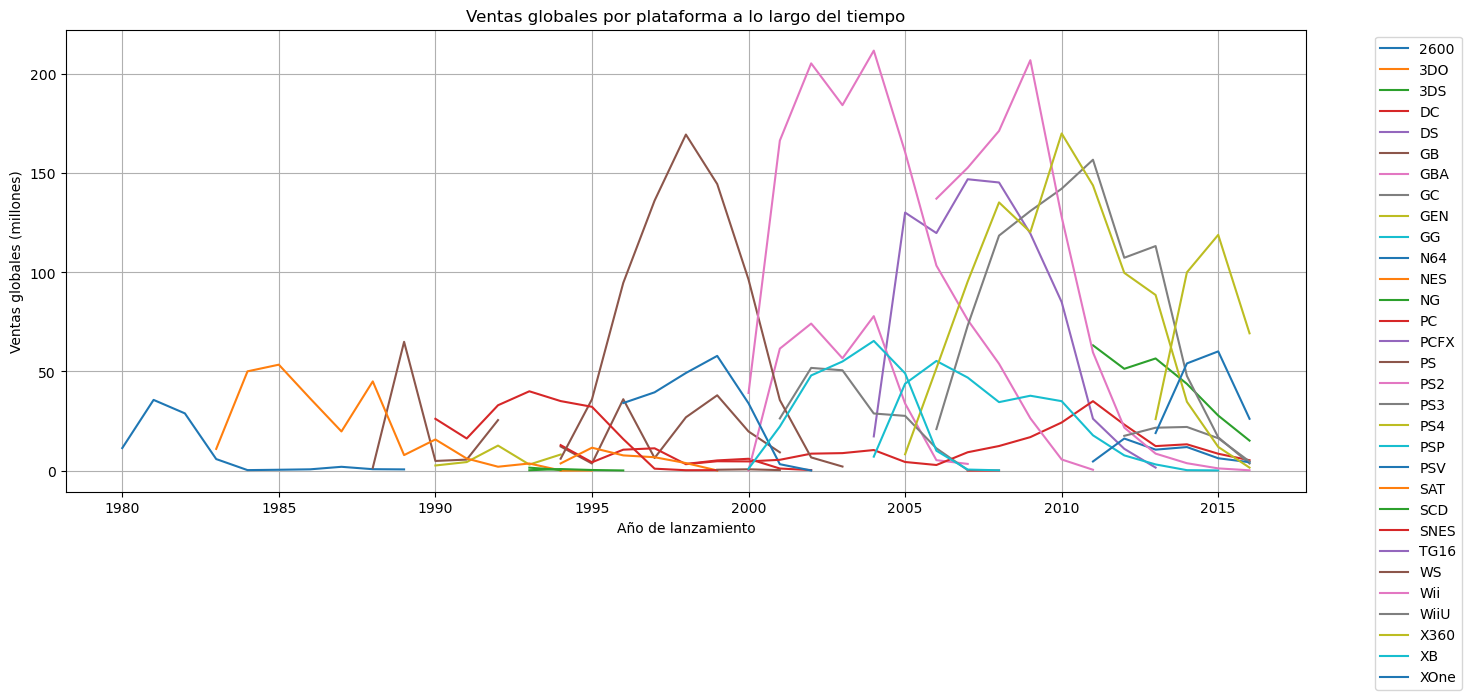

In [9]:
# Creamos tabla de ventas por año y plataforma
platform_trends = df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='global_sales',
    aggfunc='sum'
)

# Graficamos
platform_trends.plot(figsize=(16, 6))
plt.title('Ventas globales por plataforma a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.show()


In [10]:
# Años de aparición y desaparición por plataforma
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max']).sort_values(by='min')
print(platform_lifespan)


           min   max
platform            
2600      1980  1989
NES       1983  1994
DS        1985  2013
PC        1985  2016
GB        1988  2001
SNES      1990  1999
GEN       1990  1994
GG        1992  1992
SCD       1993  1994
NG        1993  1996
SAT       1994  1999
PS        1994  2003
3DO       1994  1995
TG16      1995  1995
PCFX      1996  1996
N64       1996  2002
DC        1998  2008
WS        1999  2001
GBA       2000  2007
XB        2000  2008
PS2       2000  2011
GC        2001  2007
PSP       2004  2015
X360      2005  2016
PS3       2006  2016
Wii       2006  2016
3DS       2011  2016
PSV       2011  2016
WiiU      2012  2016
PS4       2013  2016
XOne      2013  2016


**Análisis general de plataformas**.

Las plataformas con mayores ventas totales en la historia del dataset son:

PS2 (1,255.77 millones)

Xbox 360, PS3, Wii, y Nintendo DS, todas superando los 800 millones.

Esto indica que el período más fuerte de ventas globales estuvo entre 2000 y 2011, cuando estas consolas dominaron el mercado.

Por otro lado, al observar los años de aparición y desaparición:

Algunas plataformas clásicas como Atari 2600, NES, SNES, Game Boy (GB) y PlayStation original (PS) tuvieron un largo ciclo inicial (años 80 y 90), pero ya no están activas.

Plataformas más modernas como PS4 y Xbox One aparecen a partir de 2013 y están presentes hasta el último año registrado (2016).

Muchas plataformas más antiguas desaparecen en un plazo de 5 a 10 años, lo cual parece un ciclo típico en la industria.

Además:

Algunas consolas, como PC, están activas durante todo el período (1985–2016), lo cual muestra su permanencia en el mercado, aunque con menores ventas en comparación a consolas.

La última generación visible en el dataset (2013–2016) incluye PS4, Xbox One, y WiiU, pero sus ventas aún son menores porque tienen poco tiempo de vida acumulado.

**Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores**. 


Período recomendado para construir el modelo de 2017
Según los datos:

Las plataformas más recientes (PS4, Xbox One, Wii) aparecen a partir de 2013.

Muchas plataformas anteriores ya no están activas después de 2010–2011.

Los datos de 2016 parecen incompletos, ya que ese año aún estaba en curso cuando se recopiló el dataset.

A partir de 2013, el mercado ya refleja las tendencias actuales y las plataformas que seguirán activas en 2017.

Decisión:
Vamos a tomar los datos desde 2013 hasta 2015 incluidos como nuestro período de referencia para el modelo de 2017. Esto nos da: Información reciente, plataformas activas en 2017 y datos más completos que 2016.



In [13]:
#Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
df_recent = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2015)]


**¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.**

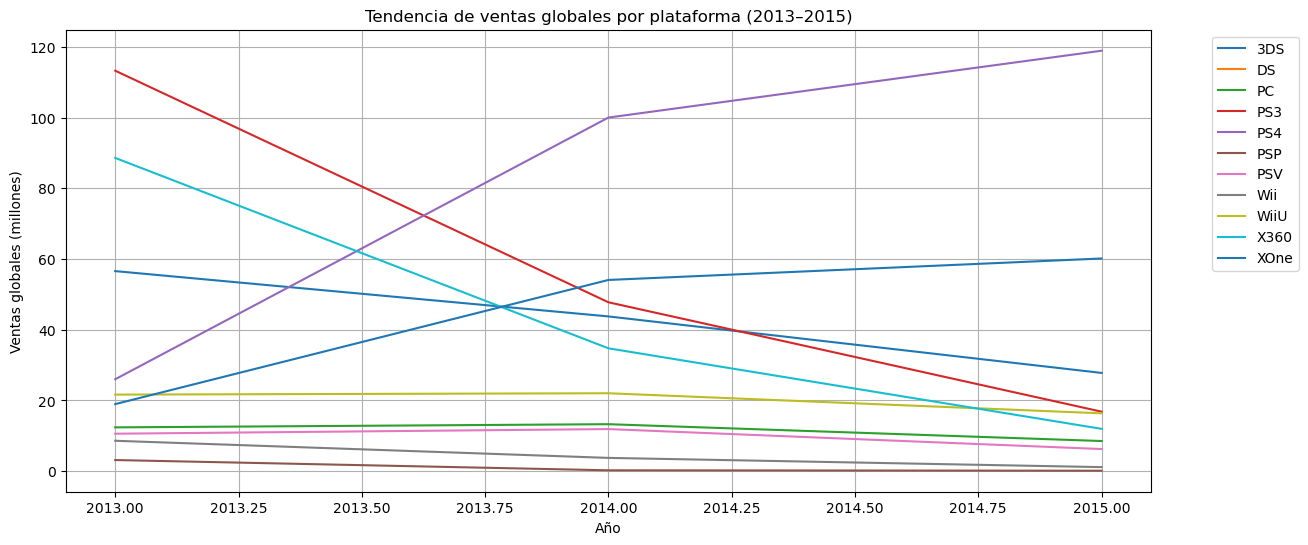

In [14]:
# Agrupamos por año y plataforma, y sumamos ventas globales
platform_trends_recent = df_recent.groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack()

# Graficamos la evolución de ventas entre 2013 y 2015
platform_trends_recent.plot(figsize=(14, 6))
plt.title('Tendencia de ventas globales por plataforma (2013–2015)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Análisis de plataformas (2013–2015)

Al analizar las ventas globales por plataforma en los años recientes, se observan varias tendencias importantes:

- **Plataformas en declive**: PS3, Xbox 360 y Nintendo Wii muestran una disminución clara en ventas, lo que indica el fin de su ciclo de vida. También se observa una caída en 3DS y WiiU, lo que sugiere una menor participación de Nintendo en esta etapa.

- **Plataformas en crecimiento**: PS4 y Xbox One tienen una tendencia ascendente sólida desde su lanzamiento en 2013. Esto indica que están ganando terreno rápidamente y se perfilan como líderes del mercado para 2017.

- **PC**: Aunque con menor volumen de ventas en comparación con consolas, el mercado de PC se mantiene estable a lo largo de los años. Esto refleja una base de usuarios constante y sostenida.

**Conclusión**: Para planificar una campaña efectiva en 2017, las plataformas más rentables y con mayor potencial serían PS4 y Xbox One. La plataforma PC también puede considerarse estratégica por su estabilidad, aunque con expectativas de menor volumen.


**Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.** ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

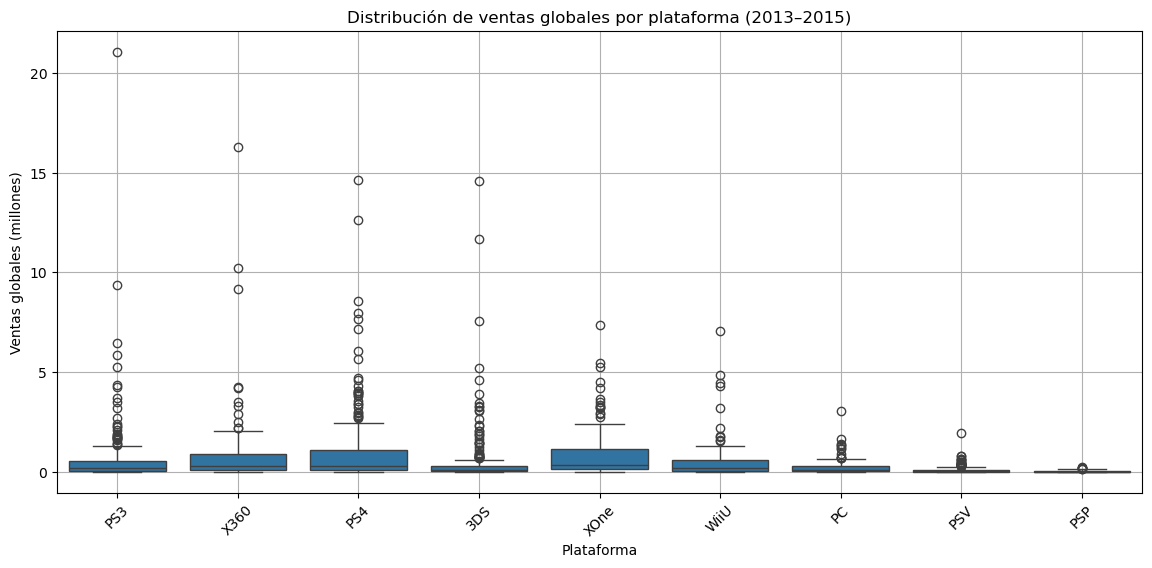

In [15]:
# Elegimos plataformas con más de cierta cantidad de juegos (ej. 50) para evitar ruido
top_platforms = df_recent['platform'].value_counts()
top_platforms = top_platforms[top_platforms > 50].index

# Filtramos el DataFrame
filtered_df = df_recent[df_recent['platform'].isin(top_platforms)]

# Creamos el boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='global_sales', data=filtered_df)
plt.title('Distribución de ventas globales por plataforma (2013–2015)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


A partir de que hemos filtrado el data frame por las plataformas con mas ventas, podemos notar que a simple vista, la diferencia no es mucha, ya que la mayoria de las ventas en cada plataforma oscilan entre 1 y 2 millones, no obstante hay mucha dispersion en los datos con ventas en algunas plataformas muy atipicas como lo es ps4,3ds, xbox one. de igual manera, se puede ver que los rangos superiores de ventas de las plataformas de igual manera son mas altos en xbox one, ps4 y otra plataforma de nuestro interes que era pc, es la que tiene el nivel de ventas promedio mas estable, es decir que tiene poco rango y pocas ventas atipicas, lo cual dice que es estable, no obstante no vende demasiado. 

**Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección)**. Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

**Plataforma a elegir**
Vamos a usar PS4, ya que:

Está en crecimiento (como vimos antes).

Tiene buen volumen de datos recientes.

Es relevante para el análisis de 2017.

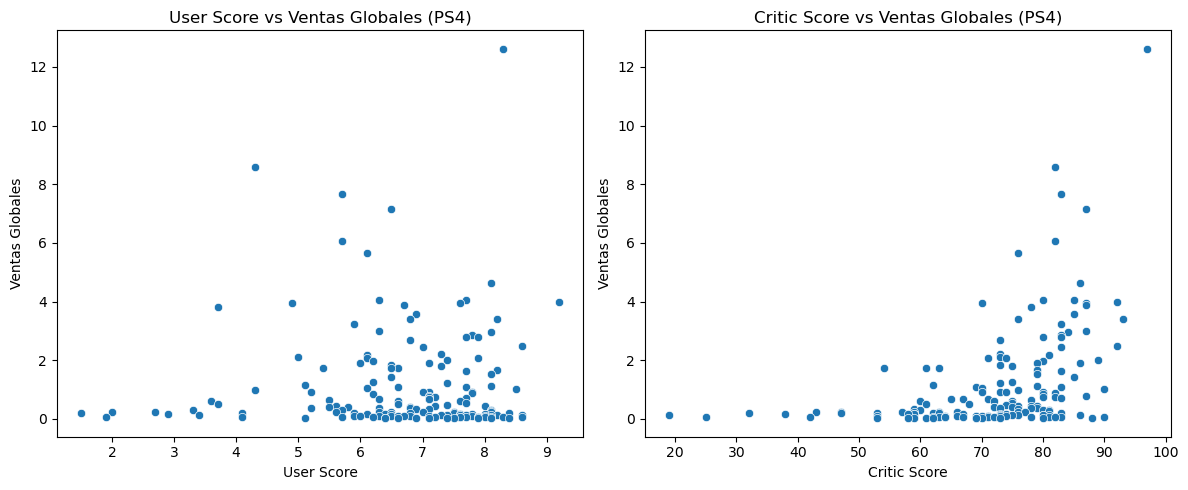

Correlación entre User Score y Ventas: 0.02
Correlación entre Critic Score y Ventas: 0.43


In [16]:
# Filtramos juegos de PS4 con datos completos
ps4_data = df_recent[df_recent['platform'] == 'PS4']
ps4_data = ps4_data[['user_score', 'critic_score', 'global_sales']].dropna()

# Gráfico: puntuación de usuarios vs ventas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='global_sales', data=ps4_data)
plt.title('User Score vs Ventas Globales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Ventas Globales')

# Gráfico: puntuación de críticos vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='global_sales', data=ps4_data)
plt.title('Critic Score vs Ventas Globales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Globales')

plt.tight_layout()
plt.show()

# Correlaciones
user_corr = ps4_data['user_score'].corr(ps4_data['global_sales'])
critic_corr = ps4_data['critic_score'].corr(ps4_data['global_sales'])

print(f'Correlación entre User Score y Ventas: {user_corr:.2f}')
print(f'Correlación entre Critic Score y Ventas: {critic_corr:.2f}')


Podemos observar, por medio de las graficas y de la correlacion, que entre las ventas y la calificacion que agregan los usuarios hay muy poca relacion, ya que se observa en la grafica que hay muchos juegos con calificacion en user score muy altas entre 7 y 9, con ventas no tan buenas. No obstante, en la otra mano existe mas relacion entre la calificacion que brindan los criticos profesionales a las ventas globales; se puede inferir observando el diagrama,  que las calificaciones mas altas tienen las ventas mal altas tambien, incluso, se observa un valor atipico de un juego con calificacion de casi 100, tiene las ventas mas altas, no obstante, su correlacion al ser menor de 0.50 (0.43) la relacion no es tan fuerte como para ser considerada como una certeza 

In [17]:
# Contamos cuántas plataformas tiene cada juego
multi_platform_games = df_recent['name'].value_counts()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Filtramos el DataFrame a solo juegos que aparecen en varias plataformas
multi_platform_df = df_recent[df_recent['name'].isin(multi_platform_games)]

# Veamos algunos ejemplos (primeros 5 juegos y sus ventas por plataforma)
ejemplos = multi_platform_df.groupby(['name', 'platform'])['global_sales'].sum().reset_index()
print(ejemplos.sort_values('name').head(50))


                                                 name platform  global_sales
0                                Frozen: Olaf's Quest      3DS          0.59
1                                Frozen: Olaf's Quest       DS          0.51
2                          2014 FIFA World Cup Brazil      PS3          0.61
3                          2014 FIFA World Cup Brazil     X360          0.43
4                   3rd Super Robot Wars Z Jigoku Hen      PS3          0.23
5                   3rd Super Robot Wars Z Jigoku Hen      PSV          0.19
6                 3rd Super Robot Wars Z: Tengoku-Hen      PS3          0.15
7                 3rd Super Robot Wars Z: Tengoku-Hen      PSV          0.19
9                      Accel World: Kasoku no Chouten      PSP          0.01
8                      Accel World: Kasoku no Chouten      PS3          0.02
10  Adventure Time: Explore the Dungeon Because I ...      3DS          0.14
11  Adventure Time: Explore the Dungeon Because I ...      PS3          0.04

No creeria que el juego mas comprado era de nintendo ds, no obstante, vemos que son pocos los juegos que estan en varias plataformas, a excepcion de unos cuantos, que son adventure time, angry birds, alien, y si comparamos las 2 plataformas mas rentables hasta el momento ( xbox one o 360 y ps3 o ps4) vemos que la gente, basandonos en sus ventas, prefiere play station en lugar de xbox, aunque no es mucha la diferencia

**Echa un vistazo a la distribución general de los juegos por género.** ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [18]:
# Agrupamos por género: conteo de juegos y suma de ventas
genre_stats = df_recent.groupby('genre').agg(
    total_sales=('global_sales', 'sum'),
    game_count=('name', 'count'),
)
# Calculamos la venta promedio por juego
genre_stats['avg_sales_per_game'] = genre_stats['total_sales'] / genre_stats['game_count']

# Ordenamos por total de ventas
genre_stats = genre_stats.sort_values(by='total_sales', ascending=False)

print(genre_stats)


              total_sales  game_count  avg_sales_per_game
genre                                                    
Action             291.76         588            0.496190
Shooter            194.76         140            1.391143
Role-Playing       127.71         238            0.536597
Sports             127.16         166            0.766024
Misc                60.22         123            0.489593
Platform            39.40          59            0.667797
Racing              37.10          61            0.608197
Fighting            30.84          64            0.481875
Simulation          19.87          44            0.451591
Adventure           19.82         189            0.104868
Strategy             8.95          43            0.208140
Puzzle               3.16          16            0.197500


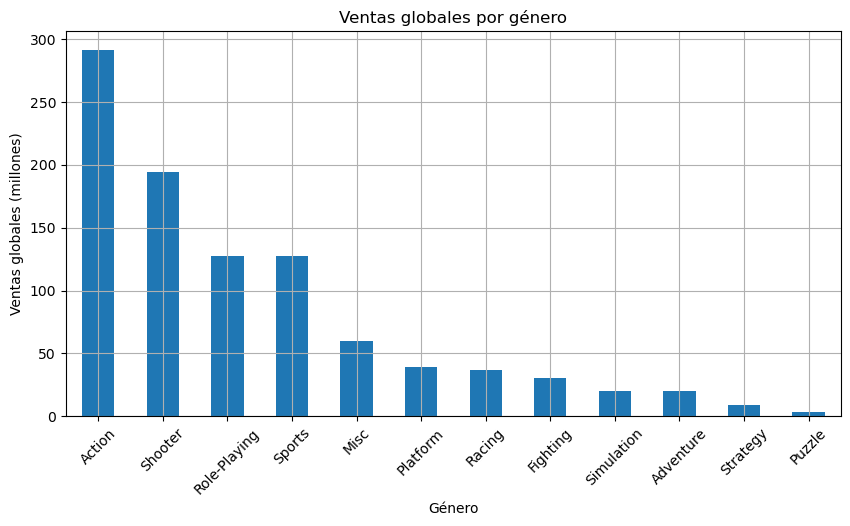

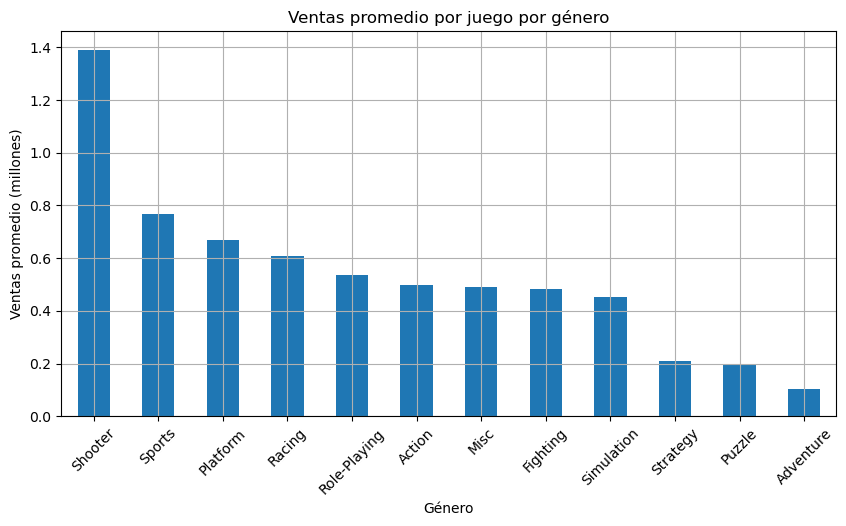

In [19]:
# Gráfico: ventas totales por género
genre_stats['total_sales'].plot(kind='bar', figsize=(10, 5), title='Ventas globales por género')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico: ventas promedio por juego (rentabilidad)
genre_stats['avg_sales_per_game'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Ventas promedio por juego por género')
plt.ylabel('Ventas promedio (millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Paso 4. Crea un perfil de usuario para cada región

**Para cada región (NA, UE, JP) determina:**

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [20]:
# Agrupamos por plataforma y sumamos ventas por región
region_sales = df_recent.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Top 5 plataformas por región
top_na = region_sales['na_sales'].sort_values(ascending=False).head(5)
top_eu = region_sales['eu_sales'].sort_values(ascending=False).head(5)
top_jp = region_sales['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 en NA:\n", top_na, "\n")
print("Top 5 en EU:\n", top_eu, "\n")
print("Top 5 en JP:\n", top_jp)


Top 5 en NA:
 platform
PS4     87.25
X360    80.97
XOne    78.85
PS3     62.83
3DS     34.06
Name: na_sales, dtype: float64 

Top 5 en EU:
 platform
PS4     109.31
PS3      66.55
XOne     41.96
X360     41.81
3DS      28.63
Name: eu_sales, dtype: float64 

Top 5 en JP:
 platform
3DS     59.78
PS3     22.05
PSV     15.03
PS4     10.22
WiiU    10.21
Name: jp_sales, dtype: float64


In [21]:
# Agrupamos por género y sumamos ventas por región
genre_region_sales = df_recent.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Top 5 géneros por región
top_genres_na = genre_region_sales['na_sales'].sort_values(ascending=False).head(5)
top_genres_eu = genre_region_sales['eu_sales'].sort_values(ascending=False).head(5)
top_genres_jp = genre_region_sales['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 géneros en Norteamérica:\n", top_genres_na, "\n")
print("Top 5 géneros en Europa:\n", top_genres_eu, "\n")
print("Top 5 géneros en Japón:\n", top_genres_jp)


Top 5 géneros en Norteamérica:
 genre
Action          116.76
Shooter          93.50
Sports           57.73
Role-Playing     40.51
Misc             26.73
Name: na_sales, dtype: float64 

Top 5 géneros en Europa:
 genre
Action          107.45
Shooter          71.96
Sports           48.51
Role-Playing     32.69
Misc             19.38
Name: eu_sales, dtype: float64 

Top 5 géneros en Japón:
 genre
Role-Playing    44.43
Action          33.42
Misc             8.16
Fighting         6.90
Shooter          5.55
Name: jp_sales, dtype: float64


## Comparación regional de plataformas y géneros

En **Norteamérica** y **Europa**, las plataformas más fuertes son **PS4**, **Xbox One**, **Xbox 360** y **PS3**, lo que muestra que las consolas de sobremesa dominan claramente en estos mercados. En cambio, en **Japón**, el panorama es diferente: la **Nintendo 3DS** lidera por bastante, seguida por plataformas como **PS Vita** y **WiiU**, lo que refleja una clara preferencia por consolas portátiles.

En cuanto a géneros, tanto en NA como en EU los más populares son **Action**, **Shooter** y **Sports**, lo que indica que los jugadores de esas regiones prefieren juegos con mucha acción, competitividad y dinámica rápida. Japón en cambio muestra una preferencia muy marcada por los **Role-Playing**, seguido por Action y Fighting, lo que tiene mucho sentido si se considera la cultura japonesa.

**Conclusión:** los gustos varían bastante entre regiones. No solo cambian las plataformas dominantes, sino también los géneros favoritos. Eso confirma que cualquier campaña o estrategia de ventas debería ajustarse a cada mercado según sus intereses reales.


**Las clasificaciones de ESRB afectan a las ventas en regiones individuales.**

In [22]:
# Agrupamos por clasificación ESRB y sumamos las ventas regionales
esrb_region_sales = df_recent.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Mostramos la tabla
print(esrb_region_sales)


        na_sales  eu_sales  jp_sales
rating                              
E          71.08     69.75     14.07
E10+       50.43     38.88      5.44
M         149.54    128.78     12.91
T          40.84     32.16     18.32


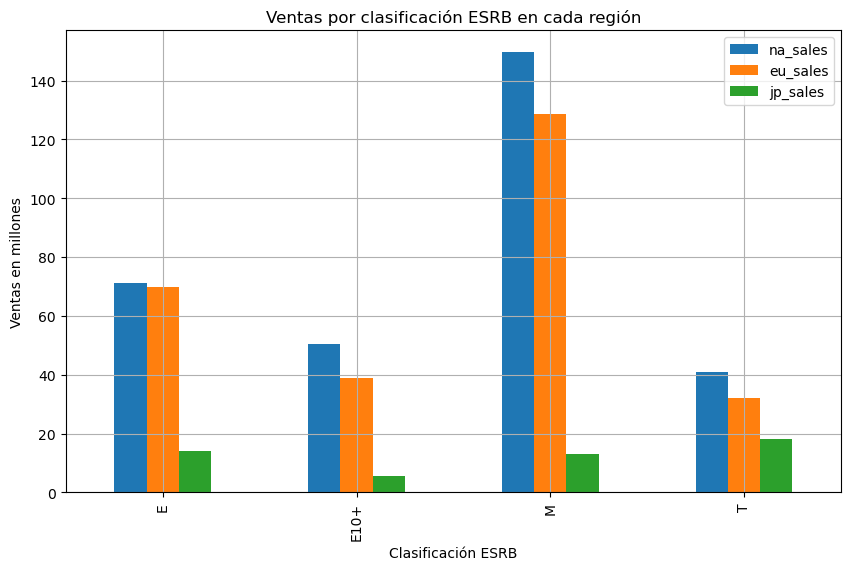

In [23]:
# Gráfico de barras apiladas por región
esrb_region_sales.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Ventas por clasificación ESRB en cada región')
plt.ylabel('Ventas en millones')
plt.xlabel('Clasificación ESRB')
plt.grid(True)
plt.show()


Se puede observar que los juegos con un rating de M (mature +17) son los mas vendidos en europa y norte america, mostrando como predomina los juegos con presencia violencia intensa, sangre, lenguaje fuerte y lo cual esta relacionado con que los generos de juego mas comprados son de accion o shooting. por otro lado, en japon juegan mas lo clasificados como teen (+10) lo cual tambien esta relacionado con que vimos que los japonese prefieren los videojuegos de rol. 

## Paso 5. Prueba las siguientes hipótesis

**Hipótesis a probar.**
¿Las calificaciones promedio de los usuarios son iguales entre Xbox One y PC?

Hipótesis nula (H₀): Las calificaciones promedio (user_score) de Xbox One y PC son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes.

In [24]:

from scipy.stats import ttest_ind, levene

# Filtramos calificaciones válidas de cada plataforma
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

# Convertimos a float (por si aún hay string)
xone_scores = xone_scores.astype(float)
pc_scores = pc_scores.astype(float)

# Prueba de Levene para varianzas
stat_levene, p_levene = levene(xone_scores, pc_scores)
print(f'Prueba de Levene - p-value: {p_levene:.5f}')

# Decisión sobre varianzas
equal_var = p_levene > 0.05
print(f'¿Varianzas iguales? {equal_var}')

# Prueba t de Student con el valor determinado
alpha = 0.05
t_stat, p_value = ttest_ind(xone_scores, pc_scores, equal_var=equal_var)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.8f}')

# Decisión final
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de Xbox One y PC.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa entre las calificaciones de Xbox One y PC.")


Prueba de Levene - p-value: 0.26940
¿Varianzas iguales? True
Estadístico t: -4.368
Valor p: 0.00001390
Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de Xbox One y PC.


 **Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

 
 Hipótesis nula (H₀): Las calificaciones promedio de los géneros Acción y Deportes son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes.

In [25]:
from scipy.stats import ttest_ind, levene

# Filtramos calificaciones válidas por género
action_scores = df[(df['genre'] == 'Action') & (df['user_score'].notna())]['user_score'].astype(float)
sports_scores = df[(df['genre'] == 'Sports') & (df['user_score'].notna())]['user_score'].astype(float)

# Prueba de Levene para varianzas
stat_levene, p_levene = levene(action_scores, sports_scores)
print(f'Prueba de Levene - p-value: {p_levene:.5f}')

# Determinar si varianzas iguales
equal_var = p_levene > 0.05
print(f'¿Varianzas iguales? {equal_var}')

# Prueba t de Student con la opción correspondiente
alpha = 0.05
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=equal_var)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.3f}')

# Decisión final
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre las calificaciones de Acción y Deportes.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencia significativa entre las calificaciones de Acción y Deportes.")


Prueba de Levene - p-value: 0.00017
¿Varianzas iguales? False
Estadístico t: 1.577
Valor p: 0.115
No se rechaza la hipótesis nula: no hay diferencia significativa entre las calificaciones de Acción y Deportes.


**Ya quedo corregido, me parece; deje las justificaciones y analisis iguales por que los resultados fueron los mismos**

**¿Cómo se formulo las hipótesis nula, alternativa y qué criterio se utilizo para probar las hipótesis y por qué??**

En ambos casos planteamos una comparación entre **dos medias** de calificaciones (`user_score`) para grupos diferentes. 

- La **hipótesis nula (H₀)** establece que **no hay diferencia** entre los promedios de los grupos comparados.
- La **hipótesis alternativa (H₁)** plantea que **sí hay una diferencia** significativa entre esas medias.

Ejemplos en este caso:

- **Plataformas Xbox One vs PC**  
  - H₀: La media de calificaciones es igual entre ambas plataformas.  
  - H₁: La media de calificaciones es diferente.

- **Géneros Acción vs Deportes**  
  - H₀: La media de calificaciones es igual entre ambos géneros.  
  - H₁: La media de calificaciones es diferente.

**¿Qué criterio se usó para probar las hipótesis?**

Utilizamos la **prueba t de Student para muestras independientes**:

- Comparamos **dos grupos distintos** (plataformas o géneros).
- Las muestras son numéricas y continuas (`user_score`).
- Las observaciones son independientes entre sí.

Elegimos la versión **con varianzas desiguales (`equal_var=False`)**, porque:
- No asumimos que la varianza de los dos grupos sea igual.
- Es más segura cuando los tamaños de muestra son distintos o las desviaciones estándar son diferentes.

Finalmente, usamos un **nivel de significancia α = 0.05**. Esto significa que aceptamos un 5% de margen de error para rechazar la hipótesis nula.

## Paso 6. Escribe una conclusión general

## Conclusión general del proyecto

Luego de analizar el dataset completo y aplicar distintos filtros y pruebas estadísticas, podemos decir que los datos fueron significativos y útiles. Se observó que el auge de los videojuegos fue más notorio entre 2007 y 2011, cuando consolas como Xbox 360 y PS3 ya estaban bien posicionadas. Esto coincidió con un aumento fuerte en el número de lanzamientos y ventas globales.

Al revisar las plataformas más exitosas históricamente, la PS2 domina con más de 1,200 millones en ventas, seguida por consolas como Xbox 360, Wii, DS y PS3. Sin embargo, muchas de estas plataformas ya no están activas. A partir de 2013, las plataformas actuales como PS4 y Xbox One comenzaron a crecer y se mantuvieron estables hasta el último año del dataset. Decidimos usar el período 2013–2015 para construir un modelo confiable para 2017, ya que es el más reciente y completo.

Durante ese período, PS4 y Xbox One fueron las que mostraron un crecimiento sostenido, mientras que consolas como WiiU o 3DS comenzaron a caer. PC, aunque tiene menores ventas, se mantuvo muy estable. El análisis de boxplot confirmó que PS4 y Xbox One tienen mayor dispersión en ventas, con juegos que logran cifras altas, mientras que PC es más pareja, pero con menores ventas.

Al observar la relación entre reseñas y ventas, notamos que el `user_score` no tiene mucha relación directa con las ventas, ya que muchos juegos bien calificados no vendieron tanto. En cambio, el `critic_score` sí mostró una relación un poco más clara, aunque la correlación no fue tan fuerte (0.43). Esto sugiere que, aunque influye, no es un factor determinante por sí solo.

También analizamos juegos que salieron en varias plataformas. Aunque no son tantos, vimos que PlayStation suele tener mejores ventas que Xbox cuando un mismo título está disponible en ambas, aunque la diferencia no siempre es grande.

Al comparar regiones, vimos que NA y Europa prefieren consolas de sobremesa como PS4 y Xbox One, y géneros como Action, Shooter y Sports. Japón, en cambio, tiene una fuerte inclinación por consolas portátiles como 3DS y PS Vita, y por juegos de género Role-Playing, lo cual se alinea con la cultura local. Las clasificaciones ESRB también mostraron algo similar: en NA y Europa predominan los juegos con clasificación M (mayores de 17 años), mientras que en Japón se venden más juegos clasificados como T (mayores de 13), lo cual también coincide con los géneros preferidos en cada región.

Por último, realizamos pruebas estadísticas. En la comparación entre Xbox One y PC, se encontró una diferencia significativa entre las calificaciones de usuarios (p = 0.00000494), por lo tanto rechazamos la hipótesis nula. En cambio, al comparar géneros de Acción y Deportes, no se encontró una diferencia significativa (p = 0.115), así que no se rechazó la hipótesis.

### Recomendaciones para 2017

- **Invertir principalmente en PS4 y Xbox One**, ya que son las plataformas con mayor crecimiento reciente y mayor potencial de ventas para el próximo año.
- **No descartar PC** como plataforma secundaria. Aunque no tiene los mismos niveles de venta, es muy estable y puede servir para lanzamientos con menor presupuesto o que buscan públicos más específicos.
- **Enfocar campañas en géneros como Acción y Shooter** en regiones como Norteamérica y Europa, ya que son los más populares.
- **Para Japón**, apostar por juegos de tipo Role-Playing y enfocados a consolas portátiles (como 3DS o PS Vita), ya que ese tipo de contenido es mejor recibido.
- **No depender únicamente de las calificaciones de usuarios**, ya que no están tan relacionadas con las ventas. En cambio, trabajar la imagen con críticos puede tener más impacto si se logra una buena puntuación.
- **Considerar la clasificación ESRB al diseñar y promocionar juegos**, sobre todo si se apunta a mercados como NA o EU, donde los títulos con clasificación M tienden a vender más.

Estas recomendaciones están basadas directamente en los hallazgos y tendencias observadas en los datos más recientes, por lo que pueden aportar valor real para la estrategia comercial de la tienda en 2017.
